<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


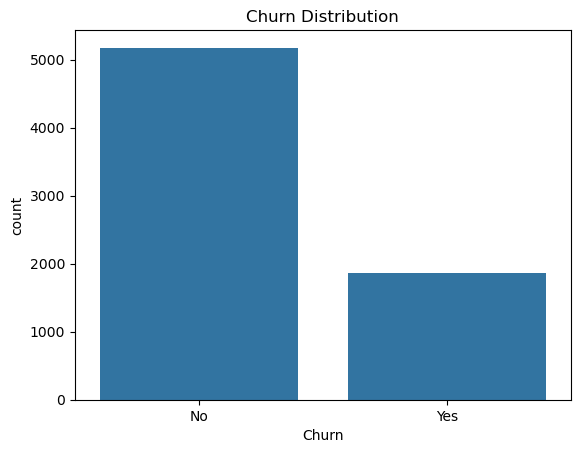

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [43]:
import pandas as pd #For handling datasets (DataFrame)
import matplotlib.pyplot as plt #For creating charts
import seaborn as sns # For prettier charts

#Load Dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

#View the first 5 rows
df.head()

#Get info about the dataset
df.info()

#Checks for missing values
df.isnull().sum()

#plot churn distribution
sns.countplot(x='Churn' , data = df)
plt.title('Churn Distribution')
plt.show()

#Clean & Prepare the Data
#Drop the customerID column
df.drop('customerID' , axis=1, inplace=True)

#Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce')

#check again missing values
df.isnull().sum()

#Drop rows where TotalCharges is NaN
df.dropna(subset=['TotalCharges'], inplace=True)

#Check data types again
df.info()

#convert 'Churn' column to 1 and 0
df['Churn'] = df['Churn'].map({'Yes' : 1, 'No': 0})

#one-hot encode all remaining categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

#view the shape and first few rows
print(df_encoded.shape)
df_encoded.head()

#Seperate features and targets
#All columns except Churn
x = df_encoded.drop('Churn', axis=1)

#Churn column only
y = df_encoded['Churn']

from sklearn.model_selection import train_test_split
#Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


from sklearn.linear_model import LogisticRegression
#Create the model
model = LogisticRegression(max_iter=3000)

#Train the model
model.fit(x_train, y_train)

#Make predictions
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Accuracy
print("Accuracy:" , accuracy_score(y_test, y_pred))

#Confusion Matrix
print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

from sklearn.ensemble import RandomForestClassifier

#Train with class_weight to handle imbalance
rf_balanced = RandomForestClassifier(n_estimators=100, class_weight= 'balanced', random_state=42)
rf_balanced.fit(x_train, y_train)

#predict and evaluate
rf_balanced_preds = rf_balanced.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Balanced Random Forest Accuracy:", accuracy_score(y_test, rf_balanced_preds))
print("\nClassification Report:\n", classification_report(y_test, rf_balanced_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_balanced_preds))

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

#create the base model with class_weight
rf = RandomForestClassifier(class_weight = 'balanced', random_state = 42)

#set up GridSearch
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

#Run the search
grid_search.fit(x_train, y_train)

#print best parameters
print("Best parameters found:", grid_search.best_params_)

#save the best model
best_model = grid_search.best_estimator_

#predict and evaluate
y_pred_best = best_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

!pip install joblib

import joblib

#save the model to a file
joblib.dump(best_model, 'churn_model.pk1')

#To reuse the model
loaded_model = joblib.load('churn_model.pk1')
print("✅ Model loaded successfully!")

# Make a prediction using the first row of X_test (with column names)
sample = x_test.iloc[[0]]  # Double brackets keep it as a DataFrame
prediction = loaded_model.predict(sample)

print("Prediction (Churn = 1, No Churn = 0):", prediction)
print("Actual:", y_test.iloc[0])

#show actual vs predicted
print("Actual value:", y_test.iloc[0])